Implementing Industry Applications
--

Recipe 2.   Implementing Sentiment Analysis
--

In this recipe, we are going to implement, end to end, one of the popular
NLP industrial applications – Sentiment Analysis. 

It is very important from a business standpoint to understand how customer feedback is on the products/services they offer to improvise on the products/service for customer satisfaction.

Problem
--
We want to implement sentiment analysis.

Solution
--
The simplest way to do this, is by using the TextBlob or vaderSentiment
library. Since we have used TextBlob previously, now let us use vader.

https://www.kaggle.com/snap/amazon-fine-food-reviews

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read the data
df = pd.read_csv('C:\Program Files\Python36\suven\Adv ML\datasets\datasets/Reviews.csv')

# Look at the top 5 rows of the data
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
# Understand the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [3]:
# Looking at the description of the reviews
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [5]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [6]:
# Removal of stop words
stop = stopwords.words('english')
df['Text']= df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# st = PorterStemmer()



In [7]:
# Lemmatization

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...


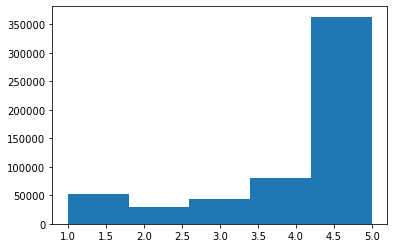

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [8]:
# Create a new data frame "reviews" to perform exploratory data analysis 
reviews = df

# Dropping null values
reviews.dropna(inplace=True)

# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.Score.hist(bins=5,grid=False)
plt.show()

print(reviews.groupby('Score').count().Id)

In [9]:
# To make it balanced data, we sampled each score by the lowest
# n-count from above. (i.e. 29743 reviews scored as '2')
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)

# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
# reset_index -> resets the index to the default i.e 0,1,2,....
# drop = True -> means don't add or show the old index
# inplace=True -> means do in-place re-arrangement itself. don't use extra memory
# do see pandas-docs for some simple quick examples.

reviews_sample.info()  # 29743 x 5 = 148715

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148715 entries, 0 to 148714
Data columns (total 10 columns):
Id                        148715 non-null int64
ProductId                 148715 non-null object
UserId                    148715 non-null object
ProfileName               148715 non-null object
HelpfulnessNumerator      148715 non-null int64
HelpfulnessDenominator    148715 non-null int64
Score                     148715 non-null int64
Time                      148715 non-null int64
Summary                   148715 non-null object
Text                      148715 non-null object
dtypes: int64(5), object(5)
memory usage: 11.3+ MB


In [10]:
!pip install vaderSentiment

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
#Importing required libraries
# !pip install vaderSentiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
 vs=analyzer.polarity_scores(row)
 emptyline.append(vs)

# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [12]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


In [13]:
# Convert scores into positive and negetive sentiments using some threshold

df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(5)


In [14]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0);
# rot = 0 -> does not rotate the x-axis labels 
# or simply said we see x-axis labels horizontally
# default is rot = 90

KeyError: 'Sentiment'

Heads up : to the final project to be submitted : https://t-lanigan.github.io/amazon-review-classifier/

Additional Reading matter : https://tm3.ghost.io/2017/04/19/amazon-food-reviews-part-i/